In [1]:
import numpy as np
import pandas as pd

from collections import Counter

from time import sleep
import json
import requests
%matplotlib inline

In [7]:
iso_df = pd.read_json('isotherms.json')
gases_df = pd.read_json('gases.json')
mat_df = pd.read_json('materials.json')

In [8]:
def form_gas_name_list(name, synonyms):
    return [name.strip()] + [s.strip() for s in synonyms]

In [9]:
gases_df['all_names_string'] = gases_df[['name', 'synonyms']].apply(lambda x: form_gas_name_list(*x), axis=1)

In [10]:
# dict {'InChi': 'gas_name'}
gases_name_dict = gases_df[['InChIKey', 'name']].set_index('InChIKey')['name'].to_dict()

In [11]:
# dict {'hashkey': 'adsorbent_name'}
adsorbent_name_dict = mat_df[['hashkey', 'name']].set_index('hashkey')['name'].to_dict()

In [12]:
iso_df['adsorbates_inchis'] = iso_df['adsorbates'].apply(lambda x: set(ads['InChIKey'] for ads in x))
iso_df['adsorbates_names'] = iso_df['adsorbates_inchis'].apply(lambda x: set(gases_name_dict[inchi] for inchi in x))
iso_df['adsorbent'] = iso_df['adsorbent'].apply(lambda x: x['hashkey'])
iso_df['adsorbent_name'] = iso_df['adsorbent'].map(adsorbent_name_dict)

In [13]:
iso_df.head()

,filename,DOI,adsorbent,adsorbates,category,temperature,tabular_data,isotherm_type,adsorbates_inchis,adsorbates_names,adsorbent_name
0,10.100215214125200211052511<1060aidceat1060>3....,10.1002/1521-4125(20021105)25:11<1060::aid-cea...,NIST-MATDB-035dc75dddd00241bd76627f78cbef2d,"[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}, ...",exp,303,0,,"{UGFAIRIUMAVXCW-UHFFFAOYSA-N, UFHFLCQGNIYNRP-U...","{Hydrogen, Carbon monoxide}",Zeolite 5A
1,10.100215214125200211052511<1060aidceat1060>3....,10.1002/1521-4125(20021105)25:11<1060::aid-cea...,NIST-MATDB-035dc75dddd00241bd76627f78cbef2d,"[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}, ...",exp,303,0,,"{UGFAIRIUMAVXCW-UHFFFAOYSA-N, UFHFLCQGNIYNRP-U...","{Hydrogen, Carbon monoxide}",Zeolite 5A
2,10.100215214125200211052511<1060aidceat1060>3....,10.1002/1521-4125(20021105)25:11<1060::aid-cea...,NIST-MATDB-035dc75dddd00241bd76627f78cbef2d,[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],exp,303,0,,{UFHFLCQGNIYNRP-UHFFFAOYSA-N},{Hydrogen},Zeolite 5A
3,10.100215214125200211052511<1060aidceat1060>3....,10.1002/1521-4125(20021105)25:11<1060::aid-cea...,NIST-MATDB-035dc75dddd00241bd76627f78cbef2d,[{'InChIKey': 'UGFAIRIUMAVXCW-UHFFFAOYSA-N'}],exp,303,0,,{UGFAIRIUMAVXCW-UHFFFAOYSA-N},{Carbon monoxide},Zeolite 5A
4,10.1002adem.200500223.isotherm1,10.1002/adem.200500223,NIST-MATDB-991daf7313251e7e607e2bab2da57e33,[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],,77,0,,{UFHFLCQGNIYNRP-UHFFFAOYSA-N},{Hydrogen},CuBTC


In [14]:
iso_df.tabular_data.value_counts()

0    35064
1      478
Name: tabular_data, dtype: int64

<AxesSubplot: >

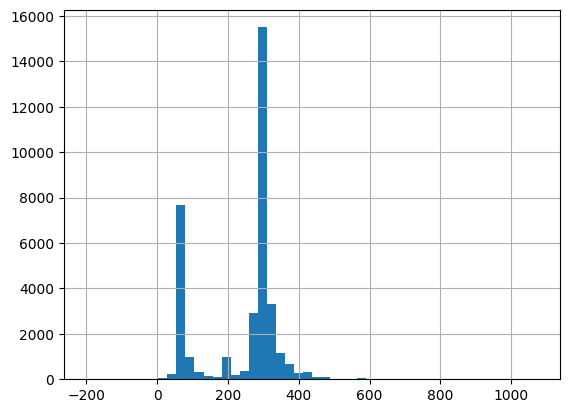

In [15]:
iso_df['temperature'].hist(bins=50)

In [16]:
cntr = Counter([v for set_ in iso_df['adsorbates_names'].values for v in set_ ])

In [17]:
cntr.most_common(15)

[('Carbon Dioxide', 8266),
 ('Nitrogen', 7174),
 ('Hydrogen', 5163),
 ('Methane', 4885),
 ('Water', 2167),
 ('Argon', 814),
 ('N-propane', 763),
 ('Ethane', 720),
 ('Ethene', 672),
 ('Propene', 596),
 ('Oxygen', 480),
 ('Benzene', 418),
 ('Carbon monoxide', 362),
 ('Methanol', 315),
 ('Xenon', 294)]

In [18]:
cntr.keys()

dict_keys(['Hydrogen', 'Carbon monoxide', 'Nitrogen', 'Methanol', 'Ethanol', 'Dimethyl ether', 'N-Hexane', 'Cyclohexane', 'Benzene', 'Water', 'N-propane', 'Toluene', 'Ethylbenzene', 'P-Xylene', '1-Propanol', '1-Butanol', 'Carbon Dioxide', 'Methane', 'Oxygen', '2-Propanol', 'Argon', 'Deuterium', 'Methyl ethyl ketone', 'Xenon', 'Krypton', 'Sulfur dioxide', 'Nitrogen Dioxide', 'Nitric oxide', 'Nitrous Oxides', 'Hydrogen sulfide', 'P-Chlorotoluene', 'Chlorobenzene', 'Ethane', 'Ammonia', 'Sulfur Hexafluoride', 'Ethene', 'Acetone', 'N-Butane', 'Propene', 'Isobutane', 'Acetonitrile', 'Isobutanol', 'M-Xylene', 'O-Xylene', 'Nitrobenzene', 'N-Pentane', '2-Methylbutane', 'Methylene blue', 'Methyl Orange', 'Cadmium(II) Ion', 'Ni(II)', 'Lead(II) Ion', 'Acetylene', 'di-PEG-lysozyme-5kDa', 'Trans-2-Butene', '1-butene', 'Cis-2-Butene', 'Tert-Butanol', '1-Pentanol', 'Pyridine', 'Carbon Tetrachloride', 'Sevoflurane', 'N-Octane', '2-Methylheptane', '2,5-Dimethylhexane', 'Isooctane', 'Isobutene', 'Sunset 

In [19]:
cntr_sorbents = Counter(iso_df['adsorbent_name'].values)

In [20]:
cntr_sorbents.most_common(15)

[('CuBTC', 1616),
 ('IRMOF-1', 1254),
 ('Carbon', 1105),
 ('Zeolite 13X', 764),
 ('ZIF-8', 605),
 ('Zeolite 5A', 567),
 ('Silicalite MFI', 319),
 ('Mg-MOF-74', 300),
 ('MOF-177', 289),
 ('MIL-101', 286),
 ('MIL-53(Al)', 246),
 ('UiO-66', 190),
 ('MOF-74-Ni', 183),
 ('MCM-41', 135),
 ('Zeolite 4A', 131)]

In [21]:
len(cntr_sorbents.keys())

6125

# Downloading

In [22]:
adsorbates_to_take = [
                      #'Cyclohexane',
                      'Hydrogen',
                      #'Argon',
                      #'Carbon Tetrachloride', 'Trichloromethane',
                      #'Benzene', 'Toluene', 'Ethylbenzene', 'P-Xylene', 'M-Xylene', 'O-Xylene', 
                      #'Nitrobenzene', 'Pyridine', 'Thiophene', 'Naphthalene', 'Dibenzothiophene'
                     ]

Number of different sorbents which were tested on adsorption of compound from the list `adsorbates_to_take`

In [23]:
iso_df[iso_df['adsorbates_names'].apply(lambda x: any([ads in x for ads in adsorbates_to_take]))]['adsorbent_name'].nunique()

1423

In [24]:
df1 = iso_df[iso_df['adsorbates_names'].apply(lambda x: any([ads in x for ads in adsorbates_to_take]))]

In [25]:
df1.filename.size

5163

Get rid of sorbents that possibly are not MOF

In [26]:
skip_list = ['Zeolite', 'mixture', 'Carbon', 'Alumina', 'Sil',
             'Graphit', 'coal', 'anthracite', 'Clay', 'Poly', 'Lignite',
             'Graphene', 'PAN', 'antracite', 'Shale', '%', 'Matrimid',
             'Chabazite', 'Al2O3', 'gel', 'CNT', 'Buckytube', 'Zeo', 'Chemisorb']

In [27]:
df2 = df1[df1['adsorbent_name'].apply(lambda x: not any([skip.lower() in x.lower() for skip in skip_list]))]

In [28]:
df2['adsorbent_name'].nunique()

1263

In [29]:
df2.filename.size

4566

In [30]:
df2.head()

,filename,DOI,adsorbent,adsorbates,category,temperature,tabular_data,isotherm_type,adsorbates_inchis,adsorbates_names,adsorbent_name
4,10.1002adem.200500223.isotherm1,10.1002/adem.200500223,NIST-MATDB-991daf7313251e7e607e2bab2da57e33,[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],,77,0,,{UFHFLCQGNIYNRP-UHFFFAOYSA-N},{Hydrogen},CuBTC
5,10.1002adem.200500223.isotherm2,10.1002/adem.200500223,NIST-MATDB-991daf7313251e7e607e2bab2da57e33,[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],,87,0,,{UFHFLCQGNIYNRP-UHFFFAOYSA-N},{Hydrogen},CuBTC
9,10.1002adfm.200500561.Isotherm1,10.1002/adfm.200500561,NIST-MATDB-2c9380bddc59f547484ff729eab7d7cb,[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],,77,0,,{UFHFLCQGNIYNRP-UHFFFAOYSA-N},{Hydrogen},IRMOF-1
10,10.1002adfm.200500561.Isotherm2,10.1002/adfm.200500561,NIST-MATDB-2c9380bddc59f547484ff729eab7d7cb,[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],,87,0,,{UFHFLCQGNIYNRP-UHFFFAOYSA-N},{Hydrogen},IRMOF-1
11,10.1002adfm.200500561.Isotherm3,10.1002/adfm.200500561,NIST-MATDB-2c9380bddc59f547484ff729eab7d7cb,[{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],,200,0,,{UFHFLCQGNIYNRP-UHFFFAOYSA-N},{Hydrogen},IRMOF-1


In [31]:
for v in df2['adsorbent_name'].unique():
    print(v)

CuBTC
IRMOF-1
[Zn(bdc)(ted)0.5]*2DMF*0.2H2O
[Cu(bdc)(ted)0.5]*2 DMF*0.2H2O
Co3(HCOO)6
Zn(BDC)(BPY) 0.5
Zn(NDC)(BPY) 0.5
Zn(BDC)(DMBPY) 0.5
Zn(NDC)(DMBPY) 0.5
NH2-MIL-53(Al)
Zn(2-2H)*H2O
CPP-8
CPP-7
CPP-6
MFU-4
CuBTC-bridges-Pt/AC
Pt/AC-CuBTC
MIL-101-bridges-Pt/AC
Pt/AC-MIL-101
MIL-101
Bridged-COF-1
Bridged-CuBTC
Bridged-MIL-101
COF-1
COF-1-bridges-Pt/AC
Pt/AC-COF-1
Soc-MOF
MOF-254
MOF-216
MOF-401
MOF-505
MOF-508b
C24H21In3N4O22
MAMS-1
HCu[(Cu4Cl)3(btt)8]*3.5HCl
Mn3[(Mn4Cl)3(btt)8]2*20CH3OH
JUC-48
PCN-17
SNU-3
MCF-19
SNU-M10
Zn(NO3)2*4H2O
[Li(C6H4NO2)2]*DMF
DUT-9
DUT-9-SCD
C51H33NO12Zn2
C55H43NO12Zn2
CPM-13
C16H10CuN4O4
Cu-TDPAT
PCN-80
NJU-Bai9
WUT-1a
Py-COF-1
SNU-200'
[K+SNU-200' SCN-]
[NH4+SNU-200']Cl-
[MV2+SNU-200']2Cl-
[Zn3(BTTTDTIOA)(H2O)3]n
[Zn3(TPATTTADTIOA)(H2O)3]n
[Zn3(TPBTTTATIOA)(H2O)3]n
[Zn3(TCPB)2*2H2O]*2H2O*4DMF
UPC-15
UPC-16
Zn(NO3)2*6H2O
[Zn3-(ntb)2]n
[{[Ni(cyclam)]2(mtb)}n]*3nEtOH
SNU-6
NOTT-110
NOTT-111
NOTT-102
H2BpybcCl2
{[Ln(ntb)Cl3]*xH2O}n
IRMOF-3-AMPh
UMCM-1-NH2
D

### Single adsorbate

In [32]:
gas_part = iso_df[iso_df['adsorbates_names'].apply(lambda x: 'Tetrahydrofuran' in x)]

In [33]:
gas_part['filename']

5126     10.1007s12039-015-0820-3.Isotherm3
17647            10.1021Ic301481p.isotherm2
24132           10.1021Jp405509m.Isotherm12
27984             10.1039B924181g.Isotherm7
Name: filename, dtype: object

### d

In [34]:
rand = np.random.randint

In [47]:
# download isotherm data
destination_folder = '/download'

for i, gas_isotherm_link in enumerate(df2['filename']):

    if i % 500 == 0:
        print('{} files are fetched in total'.format(i))

    try:
        URL = 'https://adsorption.nist.gov/isodb/api/isotherm/' + gas_isotherm_link + '.json'
        json_ = requests.get(URL).content

        with open(f'/download/{gas_isotherm_link}.json', 'w') as out:
            out.write(json_)

    except Exception as e:
        print('Exception occured  on link', gas_isotherm_link, e)
    else:
        sleep(rand(3, 10))

print('Finished')

0 files are fetched in total
Exception occured  on link 10.1002adem.200500223.isotherm1 [Errno 2] No such file or directory: '/download/10.1002adem.200500223.isotherm1.json'
Exception occured  on link 10.1002adem.200500223.isotherm2 [Errno 2] No such file or directory: '/download/10.1002adem.200500223.isotherm2.json'
Exception occured  on link 10.1002adfm.200500561.Isotherm1 [Errno 2] No such file or directory: '/download/10.1002adfm.200500561.Isotherm1.json'
Exception occured  on link 10.1002adfm.200500561.Isotherm2 [Errno 2] No such file or directory: '/download/10.1002adfm.200500561.Isotherm2.json'


KeyboardInterrupt: 

In [6]:
url = 'https://adsorption.nist.gov/isodb/api/isotherms.json'
json_ = requests.get(url).content
with open('isotherms.json', 'wb') as out:
    out.write(json_)